In [1]:
pwd

'/content'

In [2]:
cd /content/drive/MyDrive/Tensorflow Developer/Car Number Plate

/content/drive/MyDrive/Tensorflow Developer/Car Number Plate


In [2]:
!pip install tensorflow-gpu==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 57.2 MB/s 
     |████████████████████████████████| 463 kB 70.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires ker

In [3]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install -q .

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.13 requires dill>=0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

In [4]:
!pip install opencv-python-headless==4.1.2.30


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [3]:
pwd

'/content/drive/MyDrive/Tensorflow Developer/Car Number Plate'

In [4]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow
import time
import matplotlib.pyplot as plt

Loading model...Done! Took 48.04362869262695 seconds
Running inference for bd_car_1.jpg... [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.54753375 0.38961765 0.6470747  0.5718623 ]
 [0.507413   0.3705402  0.67793113 0.5938655 ]
 [0.4561961  0.32604355 0.710988   0.6270009 ]
 [0.4648655  0.43981698 0.71860147 0.5372188 ]
 [0.30330512 0.6051566  0.3670042  0.7195175 ]
 [0.5457038  0.43238693 0.6299013  0.5348812 ]
 [0.2469108  0.27917188 0.8539333  0.6684073 ]
 [0.5855051  0.41522354 0.66558695 0.5361378 ]
 [0.53826755 0.47363898 0.64726985 0.57963127]
 [0.4224278  0.3997038  0.6618227  0.56522393]
 [0.57183963 0.3803512  0.68406826 0.55808973]
 [0.55430377 0.45112154 0.65696084 0.49682018]
 [0.48909125 0.40993807 0.73455316 0.51086056]
 [0.55559325 0.43243116 0.6614809  0.48101956]
 [0.31852743 0.6311217  0.35236567 0.69472915]


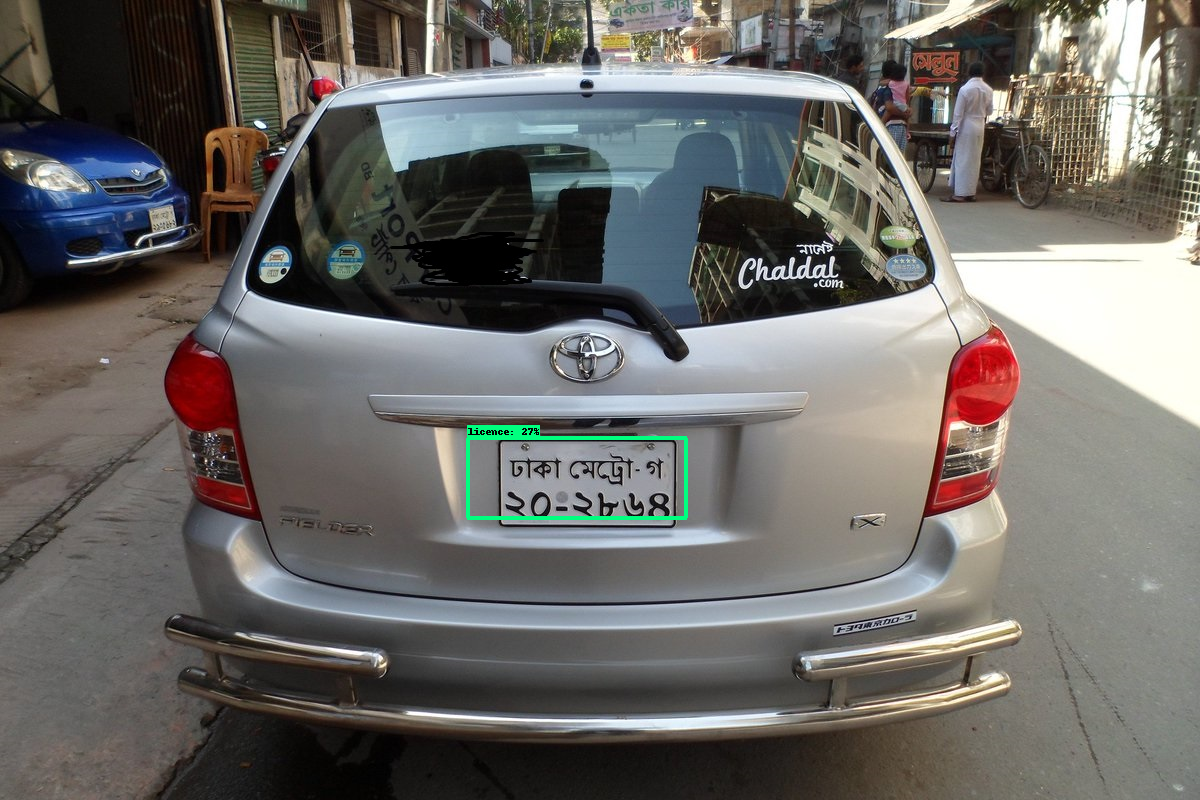

In [5]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""



# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = 'bd_car_1.jpg'
#IMAGE_PATHS = 'some images/2022-06-08 (37).png'

# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = 'training_demo/exported-models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = 'training_demo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.25)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh= MIN_CONF_THRESH,
      agnostic_mode=False)
print(detections['detection_classes'])
print(detections['detection_boxes'])
print(detections['detection_scores'])
print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED

In [9]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 5.6 MB/s 


In [5]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [6]:
import easyocr

In [7]:
detection_threshold = MIN_CONF_THRESH

In [8]:
image = image_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

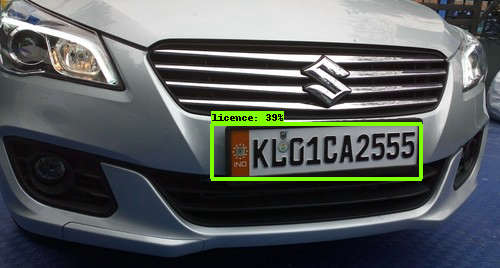

In [27]:
cv2_imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))


In [9]:
width = image.shape[1]
height = image.shape[0]

In [10]:
reader1 = easyocr.Reader(['bn'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[0.54753375 0.38961765 0.6470747  0.5718623 ]
[438.02700043 467.54118204 517.65975952 686.23473644]
[([[39, 15], [201, 15], [201, 51], [39, 51]], 'ঢাকা মেট্রো-গ', 0.4660474867912274), ([[36, 50], [208, 50], [208, 79], [36, 79]], '২০-২৮৬৪', 0.8996359688073536)]


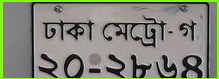

In [11]:
# Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['bn'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    cv2_imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

In [15]:
for result in ocr_result:
    #print(np.sum(np.subtract(result[0][2],result[0][1])))
    print(result[1])

ঢাকা মেট্রো-গ
২০-২৮৬৪


In [16]:
region_threshold = 0.05

In [17]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [18]:
filter_text(region, ocr_result, region_threshold)

['ঢাকা মেট্রো-গ', '২০-২৮৬৪']

In [22]:
region_threshold = 0.05

In [25]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['bn'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        cv2_imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        #plt.show()
        print(text)
        return text, region

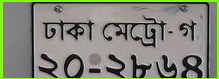

['ঢাকা মেট্রো-গ', '২০-২৮৬৪']


In [26]:
text, region = ocr_it(image_with_detections, detections, detection_threshold, region_threshold)

In [38]:
#Documents mainly for real world detections
#https://github.com/nicknochnack/RealTimeAutomaticNumberPlateRecognition/blob/main/Automatic%20Number%20Plate%20Detection.ipynb